<a href="https://colab.research.google.com/github/Manisha-0/Concrete_Crack_Detection/blob/main/cmps6720_1_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# First, make sure kaggle.json is uploaded
from google.colab import files
uploaded = files.upload()  # Upload kaggle.json

import os
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

# Install kaggle and download the dataset
!pip install kaggle
!kaggle datasets download -d arnavr10880/concrete-crack-images-for-classification

# Unzip the dataset
import zipfile
with zipfile.ZipFile('concrete-crack-images-for-classification.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

# Check the directory after extracting
print("Dataset contents after extraction:", os.listdir('/content/dataset'))


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/arnavr10880/concrete-crack-images-for-classification
License(s): Attribution 4.0 International (CC BY 4.0)
Dataset contents after extraction: ['Positive', 'Negative']


In [ ]:
import shutil
import os
from sklearn.model_selection import train_test_split

# Define the source folders
negative_folder = '/content/dataset/Negative'
positive_folder = '/content/dataset/Positive'

# Create train, val, and test directories
train_dir = '/content/dataset/train'
val_dir = '/content/dataset/val'
test_dir = '/content/dataset/test'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Create subdirectories for each class in train, val, test
train_negative = os.path.join(train_dir, 'Negative')
train_positive = os.path.join(train_dir, 'Positive')
val_negative = os.path.join(val_dir, 'Negative')
val_positive = os.path.join(val_dir, 'Positive')
test_negative = os.path.join(test_dir, 'Negative')
test_positive = os.path.join(test_dir, 'Positive')

# Create the directories if they don't exist
os.makedirs(train_negative, exist_ok=True)
os.makedirs(train_positive, exist_ok=True)
os.makedirs(val_negative, exist_ok=True)
os.makedirs(val_positive, exist_ok=True)
os.makedirs(test_negative, exist_ok=True)
os.makedirs(test_positive, exist_ok=True)

# Get the image files in the Negative and Positive folders
negative_files = os.listdir(negative_folder)
positive_files = os.listdir(positive_folder)

# Split data into 80% train, 10% validation, and 10% test
train_negative_files, test_negative_files = train_test_split(negative_files, test_size=0.2, random_state=42)
train_negative_files, val_negative_files = train_test_split(train_negative_files, test_size=0.125, random_state=42)

train_positive_files, test_positive_files = train_test_split(positive_files, test_size=0.2, random_state=42)
train_positive_files, val_positive_files = train_test_split(train_positive_files, test_size=0.125, random_state=42)

# Move files into train, validation, and test directories
for file in train_negative_files:
    shutil.move(os.path.join(negative_folder, file), os.path.join(train_negative, file))

for file in train_positive_files:
    shutil.move(os.path.join(positive_folder, file), os.path.join(train_positive, file))

for file in val_negative_files:
    shutil.move(os.path.join(negative_folder, file), os.path.join(val_negative, file))

for file in val_positive_files:
    shutil.move(os.path.join(positive_folder, file), os.path.join(val_positive, file))

for file in test_negative_files:
    shutil.move(os.path.join(negative_folder, file), os.path.join(test_negative, file))

for file in test_positive_files:
    shutil.move(os.path.join(positive_folder, file), os.path.join(test_positive, file))

print("Dataset has been organized into train, val, and test directories.")


Dataset has been organized into train, val, and test directories.


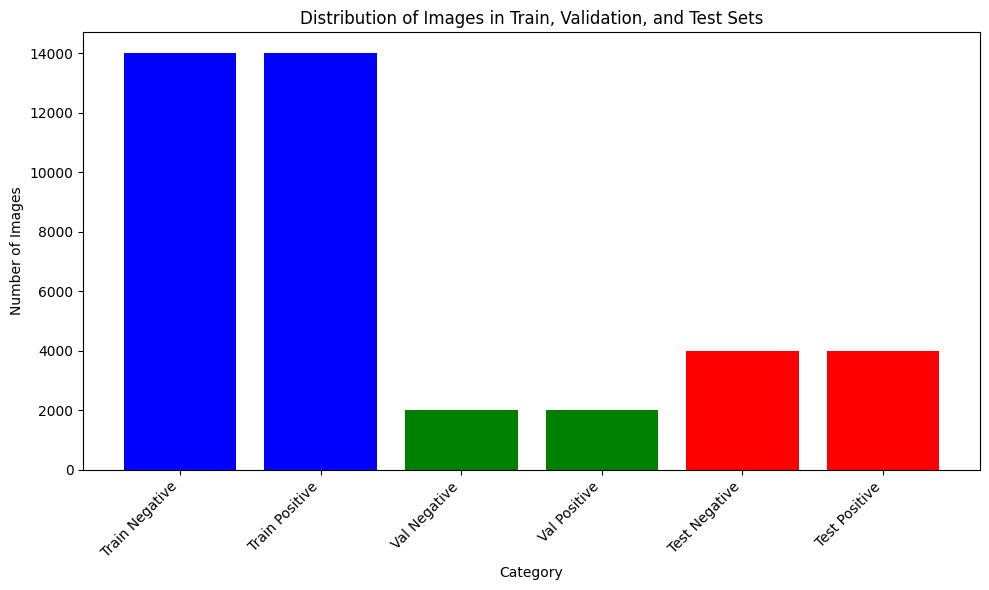

In [ ]:
import os
import matplotlib.pyplot as plt

# Define the directories
train_dir = '/content/dataset/train'
val_dir = '/content/dataset/val'
test_dir = '/content/dataset/test'

# Get the number of images in each directory
train_negative_count = len(os.listdir(os.path.join(train_dir, 'Negative')))
train_positive_count = len(os.listdir(os.path.join(train_dir, 'Positive')))
val_negative_count = len(os.listdir(os.path.join(val_dir, 'Negative')))
val_positive_count = len(os.listdir(os.path.join(val_dir, 'Positive')))
test_negative_count = len(os.listdir(os.path.join(test_dir, 'Negative')))
test_positive_count = len(os.listdir(os.path.join(test_dir, 'Positive')))

# Prepare the data for plotting
categories = ['Train Negative', 'Train Positive', 'Val Negative', 'Val Positive', 'Test Negative', 'Test Positive']
counts = [train_negative_count, train_positive_count, val_negative_count, val_positive_count, test_negative_count, test_positive_count]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=['blue', 'blue', 'green', 'green', 'red', 'red'])
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.title('Distribution of Images in Train, Validation, and Test Sets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


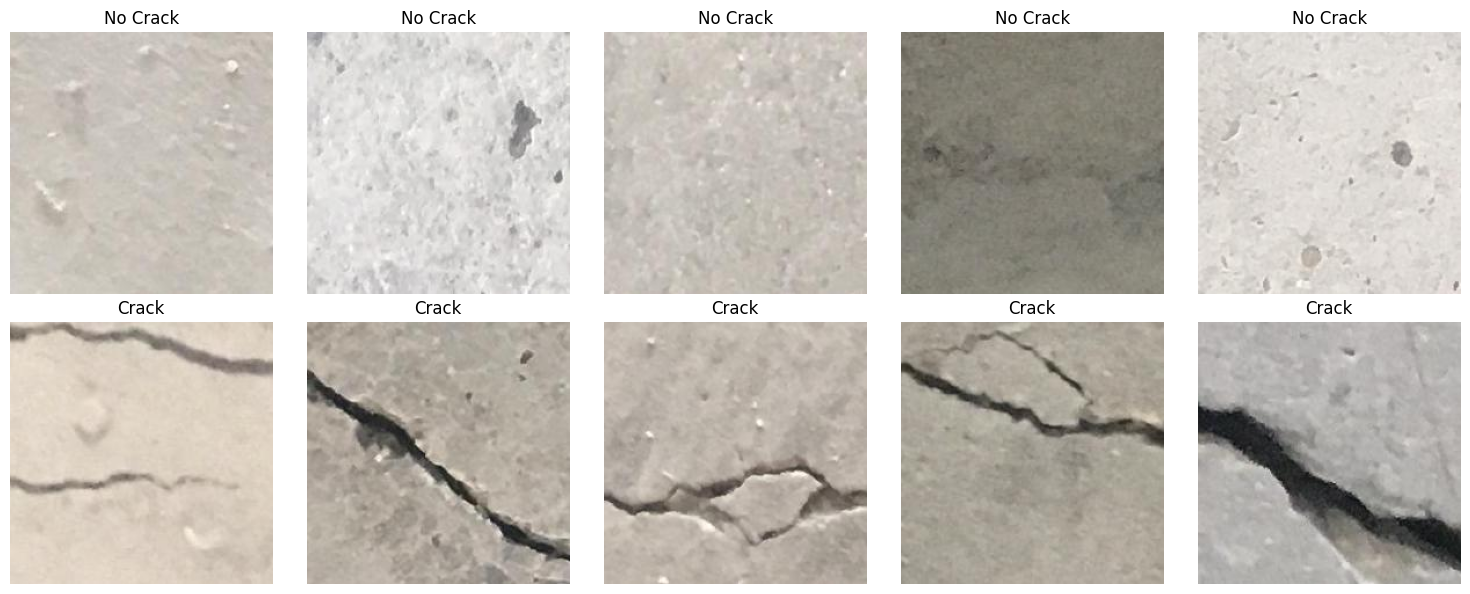

In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image

train_crack_dir = os.path.join('/content/dataset/train/Positive')
train_no_crack_dir = os.path.join('/content/dataset/train/Negative')

crack_imgs = [os.path.join(train_crack_dir, fname) for fname in os.listdir(train_crack_dir) if fname.lower().endswith(('jpg', 'png'))][:5]
no_crack_imgs = [os.path.join(train_no_crack_dir, fname) for fname in os.listdir(train_no_crack_dir) if fname.lower().endswith(('jpg', 'png'))][:5]

plt.figure(figsize=(15, 6))

for i, img_path in enumerate(no_crack_imgs):
    img = Image.open(img_path)
    plt.subplot(2, 5, i + 1)  # Two rows, five columns
    plt.imshow(img)
    plt.title("No Crack")
    plt.axis("off")

for i, img_path in enumerate(crack_imgs):
    img = Image.open(img_path)
    plt.subplot(2, 5, i + 6)  # Two rows, five columns
    plt.imshow(img)
    plt.title("Crack")
    plt.axis("off")

plt.tight_layout()

plt.savefig("/content/sample_dataset_images.png")
plt.show()


Found 28000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,396,609 (169.36 MB)

 Trainable params: 44,396,609 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


875/875 ━━━━━━━━━━━━━━━━━━━━ 64s 65ms/step - accuracy: 0.8783 - loss: 0.3086 - val_accuracy: 0.9818 - val_loss: 0.0832
Epoch 2/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 74s 63ms/step - accuracy: 0.9712 - loss: 0.0957 - val_accuracy: 0.9808 - val_loss: 0.0596
Epoch 3/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 81s 61ms/step - accuracy: 0.9764 - loss: 0.0762 - val_accuracy: 0.9845 - val_loss: 0.0509
Epoch 4/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 54s 61ms/step - accuracy: 0.9840 - loss: 0.0503 - val_accuracy: 0.9890 - val_loss: 0.0419
Epoch 5/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 83s 63ms/step - accuracy: 0.9875 - loss: 0.0420 - val_accuracy: 0.9890 - val_loss: 0.0346
Epoch 6/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 81s 61ms/step - accuracy: 0.9894 - loss: 0.0317 - val_accuracy: 0.9895 - val_loss: 0.0313
Epoch 7/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 82s 62ms/step - accuracy: 0.9926 - loss: 0.0249 - val_accuracy: 0.9915 - val_loss: 0.0328
Epoch 8/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 54s 61ms/step - accuracy: 0.9916 - loss: 0.0340 - val_accurac

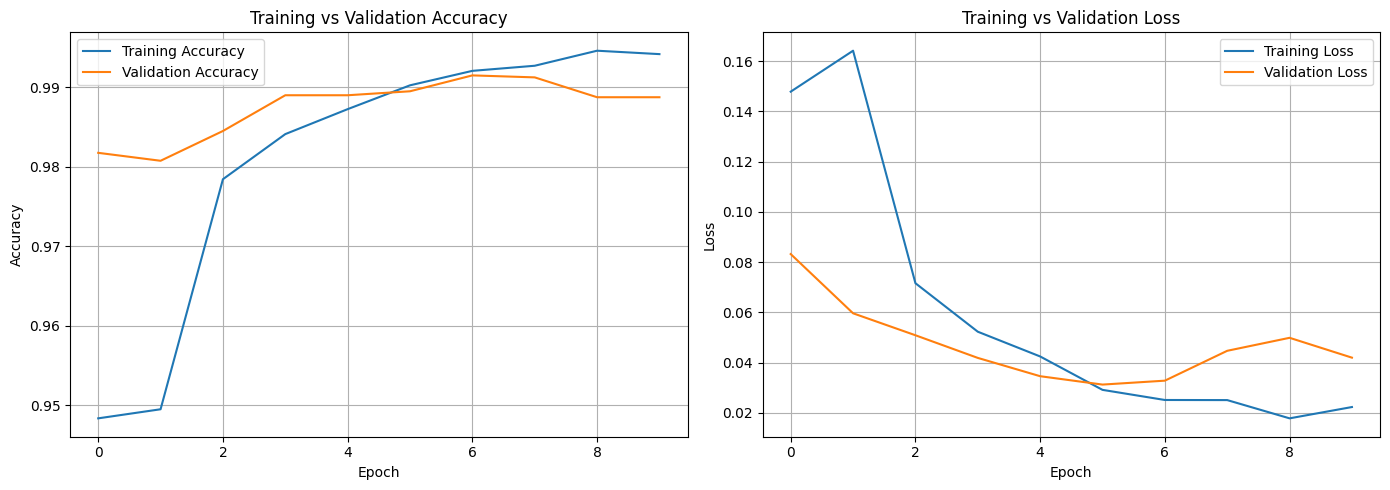

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
import matplotlib.pyplot as plt
import numpy as np

img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/content/dataset/train'
val_dir = '/content/dataset/val'

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_data = datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

model = Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // batch_size,
    epochs=10,
    validation_data=val_data,
    validation_steps=val_data.samples // batch_size
)

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Accuracy Plot
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Save the plots
plt.tight_layout()
plt.savefig('/content/accuracy_loss_combined_manual.png')
plt.show()


Found 8000 images belonging to 2 classes.
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.9858 - loss: 0.0517
Test Accuracy: 98.95%
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step

Classification Report:

              precision    recall  f1-score   support

    Negative       0.99      0.98      0.99      4000
    Positive       0.98      0.99      0.99      4000

    accuracy                           0.99      8000
   macro avg       0.99      0.99      0.99      8000
weighted avg       0.99      0.99      0.99      8000



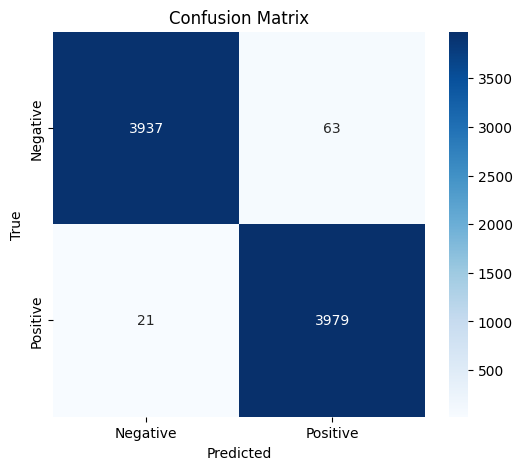

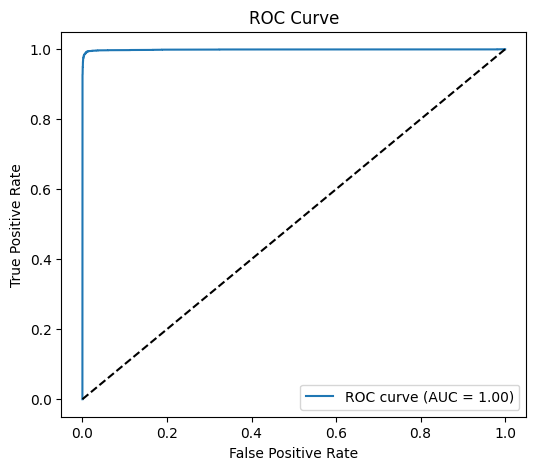

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


test_dir = '/content/dataset/test'

test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

loss, accuracy = model.evaluate(test_data)  #
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Y_pred = model.predict(test_data)
y_pred = (Y_pred > 0.5).astype(int).ravel()
y_true = test_data.classes

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=test_data.class_indices.keys()))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=test_data.class_indices.keys(),
            yticklabels=test_data.class_indices.keys())

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.savefig('/content/confusion_matrix.png')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, Y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.savefig('/content/roc_curve.png')
plt.show()


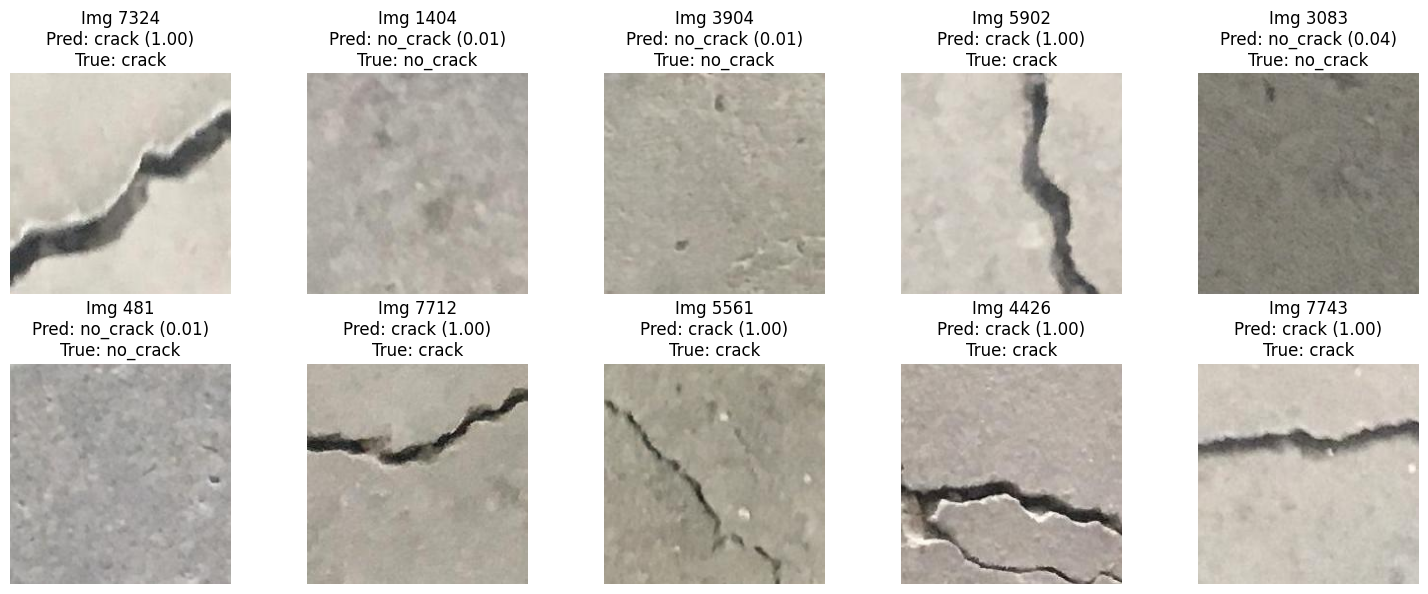


Sample Image Accuracy Report:
Correct Predictions: 10/10
Sample Accuracy: 100.00%

   Image Index     Filename Predicted  Confidence      True  Correct
0         7324  16626_1.jpg     crack        1.00     crack     True
1         1404    06985.jpg  no_crack        0.01  no_crack     True
2         3904    19559.jpg  no_crack        0.01  no_crack     True
3         5902    09327.jpg     crack        1.00     crack     True
4         3083    15441.jpg  no_crack        0.04  no_crack     True
5          481    02360.jpg  no_crack        0.01  no_crack     True
6         7712  18642_1.jpg     crack        1.00     crack     True
7         5561    07716.jpg     crack        1.00     crack     True
8         4426    01968.jpg     crack        1.00     crack     True
9         7743  18782_1.jpg     crack        1.00     crack     True


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import pandas as pd

# Assuming 'test_data' from your previous cell is the ImageDataGenerator for the test set
test_generator = test_data

# Create index-to-class mapping for displaying labels
index_to_class = {v: k for k, v in test_generator.class_indices.items()}

# Randomly sample 10 images from the test set
sample_indices = np.random.choice(len(test_generator.filenames), size=10, replace=False)

# Initialize the figure for displaying images
plt.figure(figsize=(15, 6))
detailed_results = []
correct = 0

for i, idx in enumerate(sample_indices):
    img_path = os.path.join(test_generator.directory, test_generator.filenames[idx])
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0  # Normalize the image

    # Make predictions for the image
    pred = model.predict(np.expand_dims(img_array, axis=0), verbose=0)[0][0]
    pred_label = 1 if pred > 0.5 else 0  # Threshold at 0.5 for binary classification
    pred_class = 'crack' if pred_label == 1 else 'no_crack'

    # Get the true label from the generator
    true_label = test_generator.classes[idx]
    true_class = 'crack' if true_label == 1 else 'no_crack'

    # Check if prediction is correct
    is_correct = pred_label == true_label
    correct += int(is_correct)

    # Append detailed results
    detailed_results.append({
        'Image Index': idx,
        'Filename': os.path.basename(img_path),
        'Predicted': pred_class,
        'Confidence': round(pred, 2),
        'True': true_class,
        'Correct': is_correct
    })

    # Display the image with prediction and true label
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(f"Img {idx}\nPred: {pred_class} ({pred:.2f})\nTrue: {true_class}")
    plt.axis("off")

# Adjust layout for the grid of images
plt.tight_layout()
plt.savefig("/content/test_sample_predictions_indexed.png")  # Save the grid of images
plt.show()

# Calculate sample accuracy
sample_accuracy = correct / len(sample_indices)
print(f"\nSample Image Accuracy Report:")
print(f"Correct Predictions: {correct}/{len(sample_indices)}")
print(f"Sample Accuracy: {sample_accuracy * 100:.2f}%\n")

# Convert the detailed results into a DataFrame and display
detailed_df = pd.DataFrame(detailed_results)
print(detailed_df)